In [107]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy import ndimage, datasets

In [108]:
file_ek = 'GaSe0004_old_format_proj1.h5'

with h5py.File(file_ek, 'r') as fpath_ek:

    data_ek_1921 = np.asarray(fpath_ek['Slices/K_M_1921']) #
    data_ek_1941 = np.asarray(fpath_ek['Slices/K_M_1941']) # Im Zeitüberlapp
    data_ek_2051 = np.asarray(fpath_ek['Slices/K_M_2051']) # kurz vor dem Überlapp
    data_ek_2151 = np.asarray(fpath_ek['Slices/K_M_2151']) # weit vor dem Zeitüberlapp

print(np.shape(data_ek_1921))
print(np.size(data_ek_1941))
print(np.size(data_ek_2051))
print(np.size(data_ek_2151))

print(data_ek_2151[299])

(300, 100)
30000
30000
30000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [109]:
def gradient(a):
    j = copy.deepcopy(a)
    x = np.shape(j)[0]
    for i in range(x):
        k = np.gradient(j[i])
        j[i] = k
    y = np.shape(j)[1]
    for i in range(y):
        k = np.zeros(x)
        for l in range(x):
            k[l] = j[l][i]
        p = np.gradient(k)
        for l in range(x):
            j[l][i] = p[l]

    return j

gradient(gradient(data_ek_2151))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

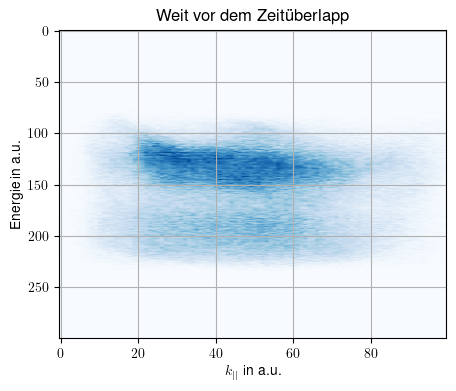

In [159]:
arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

#######################################################################################################################
# Plot structure 1 Ek
#######################################################################################################################
#plt.figure()
fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(data_ek_1921, **arg_imshow, aspect="auto")
ax.grid()
ax.set_title("Weit vor dem Zeitüberlapp")
ax.set_xlabel(r"$k_{||}$ in a.u.")
ax.set_ylabel("Energie in a.u.")
plt.show()

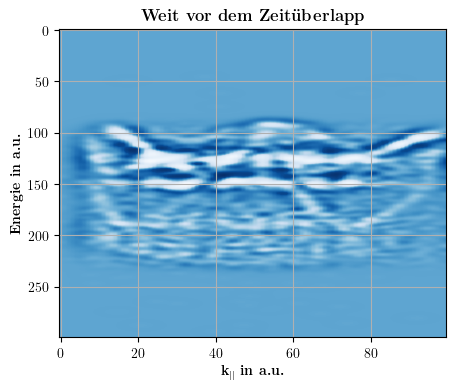

In [160]:
data_ek_2151_laplace = ndimage.gaussian_laplace(data_ek_2151,sigma = 2)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

#######################################################################################################################
# Plot structure 1 Ek
#######################################################################################################################
#plt.figure()
fig, ax = plt.subplots(figsize=(5,4))
what = ax.imshow(data_ek_2151_laplace, **arg_imshow, aspect="auto", norm="symlog")
ax.grid()
ax.set_title(r"\bf{Weit vor dem Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$ \bf{in a.u.}")
ax.set_ylabel(r"\bf{Energie in a.u.}")
#fig.colorbar(what)
plt.savefig('vorher.pdf', format='pdf', dpi=300)
plt.show()

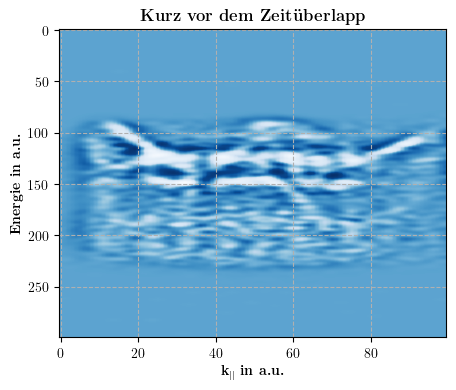

In [124]:
data_ek_2051_laplace = ndimage.gaussian_laplace(data_ek_2051,sigma = 2)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))

ax.imshow(data_ek_2051_laplace, **arg_imshow, aspect="auto",norm="symlog")
ax.grid(linestyle="dashed")
ax.set_title(r"\bf{Kurz vor dem Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$ \bf{in a.u.}")
ax.set_ylabel(r"\bf{Energie in a.u.}")
plt.savefig('kurzvorher.pdf', format='pdf', dpi=300)
plt.show()

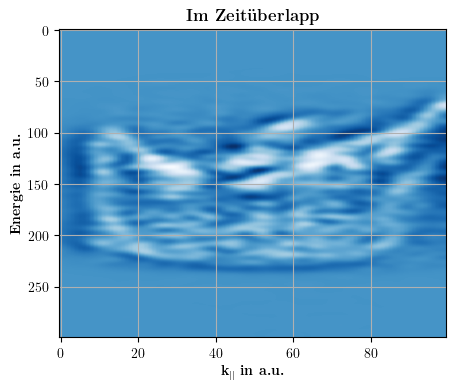

In [122]:
data_ek_1941_laplace = ndimage.gaussian_laplace(data_ek_1941,sigma = 3)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(data_ek_1941_laplace, **arg_imshow, aspect="auto",norm="symlog")
ax.grid()
ax.set_title(r"\bf{Im Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$ \bf{in a.u.}")
ax.set_ylabel(r"\bf{Energie in a.u.}")
plt.savefig('mittendrin.pdf', format='pdf', dpi=300)
plt.show()

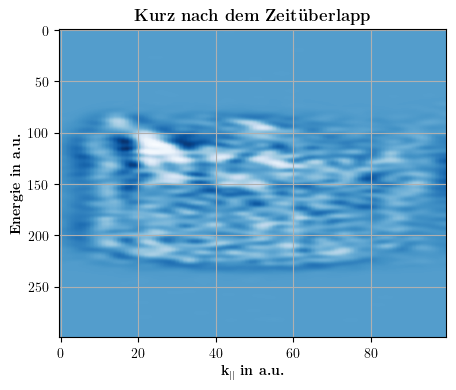

In [120]:
data_ek_1921_laplace = ndimage.gaussian_laplace(data_ek_1921,sigma = 2.5)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(data_ek_1921_laplace, **arg_imshow, aspect="auto",norm="symlog")
ax.grid()
ax.set_title(r"\bf{Kurz nach dem Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$ \bf{in a.u.}")
ax.set_ylabel(r"\bf{Energie in a.u.}")
plt.savefig('kurznacher.pdf', format='pdf', dpi=300)
plt.show()

In [115]:
# save = False

# if save is True:
#     plt.savefig('ek_GaSe0004.pdf', format='pdf', transparent=True, dpi=300)

# plt.show()